In [10]:
import sys
sys.path.append('../../')

import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Set the font size for x tick labels
plt.rc('xtick', labelsize=30)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=30)
from matplotlib.lines import Line2D



In [11]:
def get_data():
    
    columns=['Dataset','nr_clients','acc', 'lr', 'mom', 'bs','gt_lr','gt_mom','gt_bs','gt_acc']
    df = pd.DataFrame(columns=columns)
#     
#     We dont have ground-truth batchsize results so those are just random!!!
# 
    df = pd.concat([df, pd.DataFrame([['MNIST', 'Centralized', 0.99, 0.1,0.95,10,0.1,0.95,10,0.99]], columns=columns)])
    df = pd.concat([df, pd.DataFrame([['MNIST', '10 Clients', 0.98, 0.165,0.93,14,0.1,0.95,10, 0.99]], columns=columns)])
    df = pd.concat([df, pd.DataFrame([['MNIST', '20 Clients', 0.97, 0.172,0.93,13,0.1,0.95,10, 0.97]], columns=columns)])
    df = pd.concat([df, pd.DataFrame([['MNIST', '50 Clients', 0.94, 0.191,0.933,12,0.1,0.9,10, 0.96]], columns=columns)])

    
    df = pd.concat([df, pd.DataFrame([['EMNIST', 'Centralized', 0.86, 0.3,0.9,16,0.3,0.9,10,0.86]], columns=columns)])
    df = pd.concat([df, pd.DataFrame([['EMNIST', '10 Clients', 0.83, 0.34,0.9,11,0.3,0.9,10,0.84]], columns=columns)])
    df = pd.concat([df, pd.DataFrame([['EMNIST', '20 Clients', 0.81, 0.36,0.92,11,0.3,0.9,10,0.84]], columns=columns)])
    df = pd.concat([df, pd.DataFrame([['EMNIST', '50 Clients', 0.79, 0.36,0.92,9,0.2,0.9,10,0.82]], columns=columns)])
    
    df = pd.concat([df, pd.DataFrame([['SVHN', 'Centralized', 0.87, 0.2,0.9,64,0.2,0.9,10,0.87]], columns=columns)])
    df = pd.concat([df, pd.DataFrame([['SVHN', '10 Clients', 0.81, 0.225,0.861,34,0.3,0.7,10,0.82]], columns=columns)])
    df = pd.concat([df, pd.DataFrame([['SVHN', '20 Clients', 0.77, 0.217,0.8,18,0.3,0.7,10,0.80]], columns=columns)])
    df = pd.concat([df, pd.DataFrame([['SVHN', '50 Clients', 0.73, 0.193,0.77,8,0.3,0.7,10,0.74]], columns=columns)])
    
    df = pd.concat([df, pd.DataFrame([['CIFAR-10', 'Centralized', 0.75, 0.2,0.9,64,0.2,0.9,10,0.75]], columns=columns)])
    df = pd.concat([df, pd.DataFrame([['CIFAR-10', '10 Clients', 0.67, 0.24,0.912,74,0.2,0.9,10,0.66]], columns=columns)])
    df = pd.concat([df, pd.DataFrame([['CIFAR-10', '20 Clients', 0.59, 0.225,0.911,96,0.3,0.9,10,0.6]], columns=columns)])
    df = pd.concat([df, pd.DataFrame([['CIFAR-10', '50 Clients', 0.49, 0.238,0.574,47,0.3,0.9,10,0.51]], columns=columns)])

    return df

def plot_barplot(df, hue=[], title='', saveTitle='', saveFig=True, savePath='results/',param='', param_ann='',gt=''):
    sns.set_theme()
    plt.figure(figsize=(15, 5))
 
    ax = sns.barplot(y=param_ann, x="Dataset", hue="nr_clients",
                hue_order=hue, 
                data=df)
#     df['lr'].plot(y=param_ann, marker='*', color='black', ms=10)
#     ax.scatter(df['nr_clients'], df['lr'])
    handles, labels = ax.get_legend_handles_labels()

    sns.stripplot(
        data=df, 
        x="Dataset", 
        y=gt, 
        hue="nr_clients", 
        dodge=True, 
        edgecolor="black", 
        color = "black",
        linewidth=.9,
        size=8.5,
        ax=ax
    )
    plt.legend(loc='upper left')
    plt.setp(ax.get_legend().get_texts(), fontsize='20')
    plt.title(title, fontsize='18')
    ax.xaxis.label.set_fontsize(18)
    ax.yaxis.label.set_fontsize(18)
    ax.tick_params(labelsize=16)
    plt.ylabel(param)
    plt.tight_layout()
    plt.ylim([0, 1])
    handles, labels = ax.get_legend_handles_labels()
    labels=['Centralized', 'Ground Truth', 'Ground Truth', 'Ground Truth', 'Centralized', '10 Clients', '20 Clients', '50 Clients']
    l = plt.legend(handles[3:], labels[3:], loc='lower left')
    plt.setp(ax.get_legend().get_texts(), fontsize='16')

    if saveFig:
        plt.savefig(param+".pdf")
        
    plt.show()

/Users/sinemsav/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


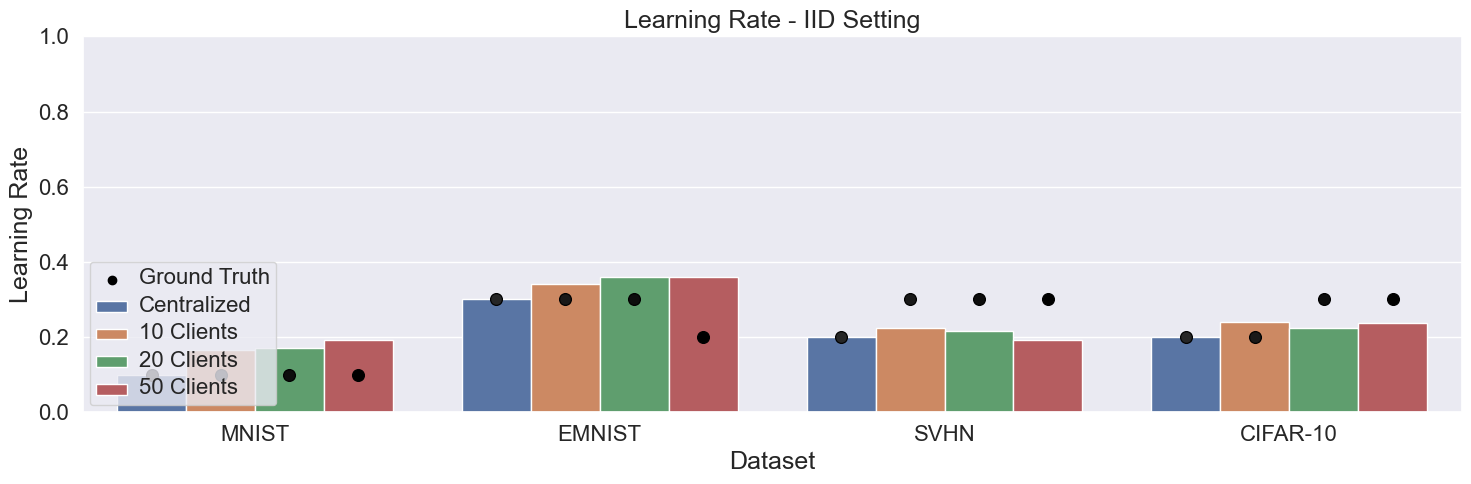

In [12]:
df = get_data()
hue = ['Centralized','10 Clients', '20 Clients', '50 Clients']
plot_barplot(df, title="Learning Rate - IID Setting", saveFig=True, hue=hue,param="Learning Rate",param_ann="lr", gt="gt_lr")

In [5]:
df = get_data()
hue = ['Centralized','10 Clients', '20 Clients', '50 Clients']
plot_barplot(df, title="Momentum - IID Setting", saveFig=True, hue=hue,param="Momentum",param_ann="mom", gt="gt_mom")

NameError: name 'pd' is not defined

In [ ]:
df = get_data()
hue = ['Ground Truth','10 Clients', '20 Clients', '50 Clients']
plot_barplot(df, title="Batch Size - IID Setting", saveFig=False, hue=hue,param="Batch Size",param_ann="bs")

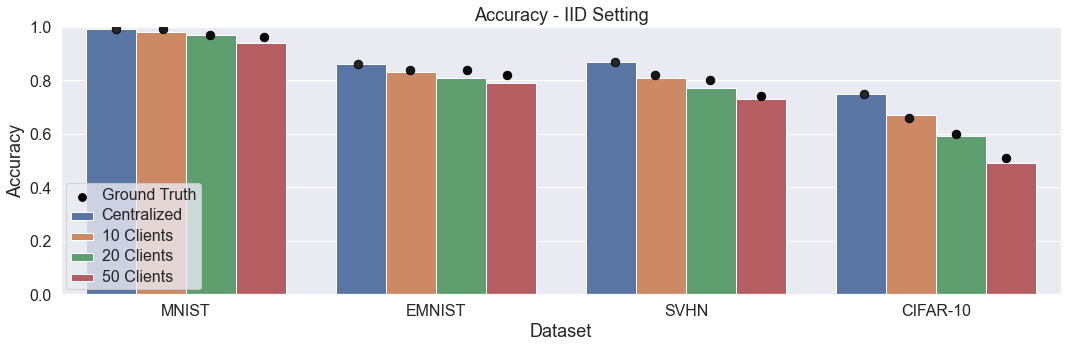

In [14]:
df = get_data()
hue = ['Centralized','10 Clients', '20 Clients', '50 Clients']
plot_barplot(df, title="Accuracy - IID Setting", saveFig=True, hue=hue,param="Accuracy",param_ann="acc", gt="gt_acc")

In [10]:
labels

NameError: name 'labels' is not defined